In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('customer_dataset.csv')

### EDA

In [285]:

variaveis_seg = df[['income','spending_score','membership_years','purchase_frequency','last_purchase_amount']]

num_all_null_rows = variaveis_seg.isnull().all(axis=1).sum()

print("Número de linhas onde todas as variáveis são vazias ou nulas:", num_all_null_rows)

num_any_null_rows = variaveis_seg.isnull().any(axis=1).sum()
print("Número de linhas onde pelo menos uma variável é vazia ou nula:", num_any_null_rows)



Número de linhas onde todas as variáveis são vazias ou nulas: 25
Número de linhas onde pelo menos uma variável é vazia ou nula: 963


In [286]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    517 non-null    float64
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
(1000, 9)


In [287]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996.0,57.0,NaN,112170.0,NaN,6.0,1.0,Clothing,313.64
996,NaN,NaN,Other,65337.0,NaN,10.0,NaN,NaN,NaN
997,998.0,23.0,NaN,NaN,NaN,NaN,42.0,Sports,NaN
998,NaN,22.0,Female,NaN,63.0,NaN,NaN,Elec,505.16
999,NaN,36.0,NaN,90420.0,NaN,NaN,31.0,Groceries,NaN


In [288]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [289]:
df['id'] = df['id'].astype(str)


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [291]:
df['age'].isnull().sum()

np.int64(549)

In [292]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,451.000000,5.120000e+02,465.000000,484.000000,515.000000,497.000000
mean,43.168514,9.820104e+04,52.494624,5.528926,26.019417,502.134547
std,15.258746,1.041681e+05,30.179857,2.851971,14.386400,301.032609
min,18.000000,3.005800e+04,1.000000,1.000000,1.000000,10.400000
25%,30.000000,5.869500e+04,28.000000,3.000000,14.000000,215.920000
50%,43.000000,8.789650e+04,50.000000,5.500000,26.000000,495.490000
75%,56.000000,1.156020e+05,78.000000,8.000000,38.000000,772.890000
max,69.000000,1.479620e+06,210.000000,10.000000,50.000000,998.510000


##Tratamento valores nulos

In [293]:
def tratar_nulos_media(df, colunas):
    for i in colunas:
        df[i] = df[i].fillna(df[i].mean())
    # df['income'] = df['income'].fillna(df['income'].mean())
    # df['spending_score'] = df['spending_score'].fillna(df['spending_score'].mean())
    # df['membership_years'] = df['membership_years'].fillna(df['membership_years'].mean())
    # df['purchase_frequency'] = df['purchase_frequency'].fillna(df['purchase_frequency'].mean())
    # df['last_purchase_amount'] = df['last_purchase_amount'].fillna(df['last_purchase_amount'].mean())

In [294]:
tratar_nulos_media(df=df, colunas=['income','spending_score','membership_years','purchase_frequency','last_purchase_amount','age'])

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                491 non-null    object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [296]:
df['gender'].value_counts()

gender
Other     166
Male       95
Female     67
M          51
male       44
female     41
F          27
Name: count, dtype: int64

## Transformando valores categoricos

In [297]:
female = ['female', 'F']
male = ['male', 'M', 'M ']

def padronizar_cat(df, coluna, lista_valores, valor):
    for i in lista_valores:
        df[coluna] = df[coluna].replace(i, valor)
        return df[coluna].value_counts()


df['gender'] = df['gender'].replace('female', 'Female')
df['gender'] = df['gender'].replace('F', 'Female')
df['gender'] = df['gender'].replace('M', 'Male')
df['gender'] = df['gender'].replace('male', 'Male')

In [298]:
padronizar_cat(df, 'gender', female, 'Female')

gender
Male      190
Other     166
Female    135
Name: count, dtype: int64

In [299]:
padronizar_cat(df,'gender', male, 'Male')

gender
Male      190
Other     166
Female    135
Name: count, dtype: int64

In [300]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [301]:
df['gender'] = df['gender'].fillna('Unknown')

In [302]:
df['preferred_category'] = df['preferred_category'].fillna('Unknown')

In [303]:
df['preferred_category'].value_counts(normalize=True)

preferred_category
Unknown          0.495
Elec             0.112
Home & Garden    0.109
Groceries        0.104
Sports           0.099
Clothing         0.081
Name: proportion, dtype: float64

In [304]:
df['gender'].value_counts(normalize=True)

gender
Unknown    0.509
Male       0.190
Other      0.166
Female     0.135
Name: proportion, dtype: float64

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                1000 non-null   object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


## Transformando tipo das variáveis

In [306]:
df['age'] = df['age'].round()

In [307]:
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

In [308]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547
4,5.0,43,Unknown,140621,210.000000,5.528926,25.000000,Unknown,502.134547


## visualização de distribuição

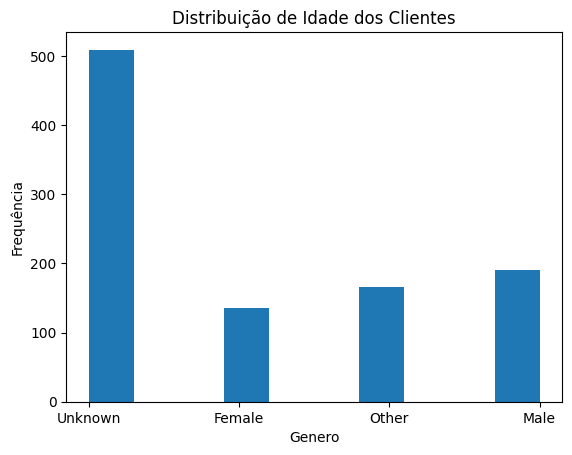

In [309]:
plt.hist(df['gender'], bins=10)
plt.xlabel('Genero')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Clientes')
plt.show()

In [310]:
df = df[df['spending_score'] <= 100]

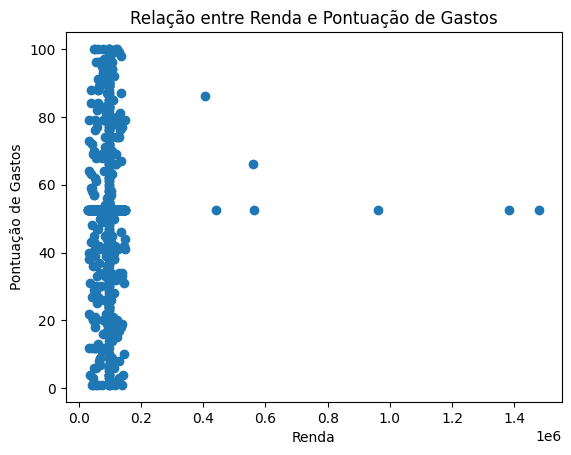

In [311]:
plt.scatter(df['income'], df['spending_score'])
plt.xlabel('Renda')
plt.ylabel('Pontuação de Gastos')
plt.title('Relação entre Renda e Pontuação de Gastos')
plt.show()

# Criando Segmentação

In [312]:

df['income_qcut'],bins = pd.qcut(df['income'], q=4,retbins=True, duplicates='drop')

In [313]:
df['income_qcut'].value_counts()

income_qcut
(86922.5, 98201.0]      537
(30057.999, 86922.5]    250
(98201.0, 1479620.0]    212
Name: count, dtype: int64

In [314]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]"
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]"
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]"
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]"
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]"


In [315]:
income_counts = df['income_qcut'].value_counts()

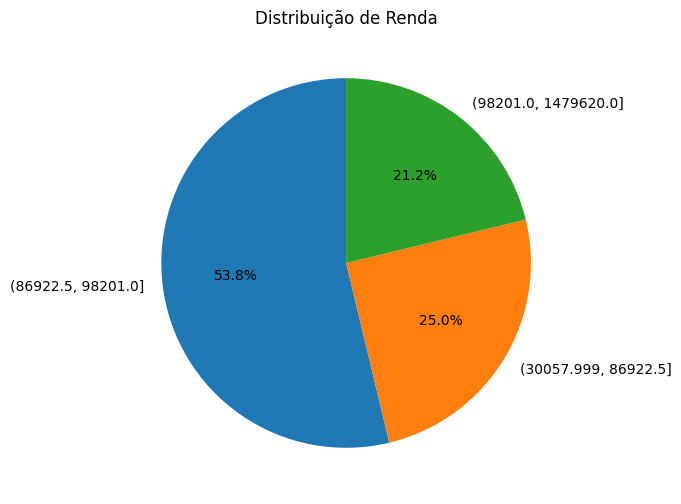

In [316]:
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Renda')
plt.show()

C:\Users\julio\AppData\Local\Temp\ipykernel_24480\1242780822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_qcut')['spending_score'].mean().plot(kind='bar')


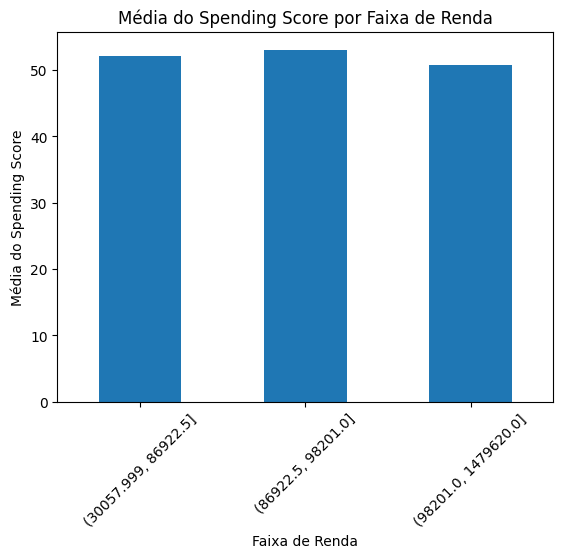

In [317]:
df.groupby('income_qcut')['spending_score'].mean().plot(kind='bar')
plt.title('Média do Spending Score por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média do Spending Score')
plt.xticks(rotation=45)
plt.show()

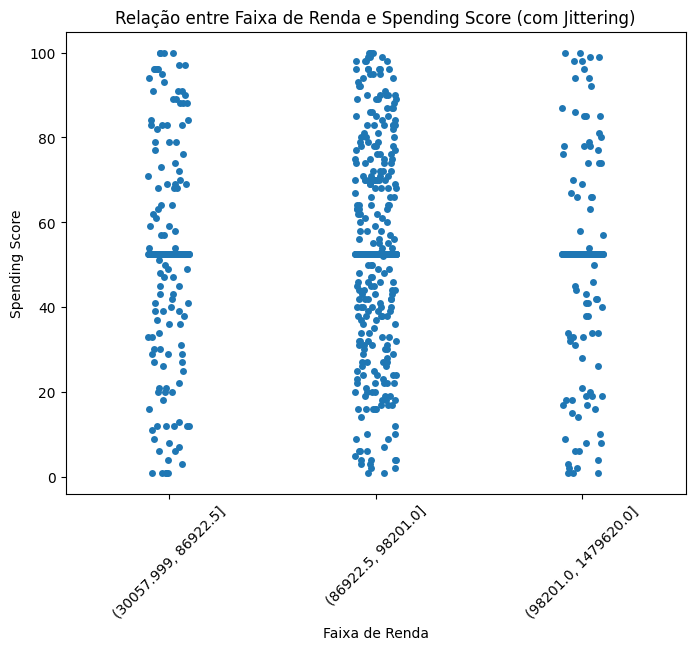

In [318]:

plt.figure(figsize=(8, 6))
sns.stripplot(x='income_qcut', y=df['spending_score'], data=df, jitter=True, dodge=True)
plt.title('Relação entre Faixa de Renda e Spending Score (com Jittering)')
plt.xlabel('Faixa de Renda')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

In [319]:
df['income_qcut'].info()

<class 'pandas.core.series.Series'>
Index: 999 entries, 0 to 999
Series name: income_qcut
Non-Null Count  Dtype   
--------------  -----   
999 non-null    category
dtypes: category(1)
memory usage: 8.9 KB


In [320]:
df['income_qcut'].value_counts()

income_qcut
(86922.5, 98201.0]      537
(30057.999, 86922.5]    250
(98201.0, 1479620.0]    212
Name: count, dtype: int64

In [321]:
mapeamento_renda = {
    '(86922.5, 98201.0]':2,
    '(30057.999, 86922.5]':1,
    '(98201.0, 1479620.0]':3
}


df['income_level'] = df['income_qcut'].astype(str).map(mapeamento_renda)


In [322]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1


In [323]:
df['income_level'].value_counts()

income_level
2    537
1    250
3    212
Name: count, dtype: int64

In [324]:
df['spending_qcut'] = pd.qcut(df['spending_score'], q=5, duplicates='drop')

In [325]:
df['spending_qcut'].value_counts()

spending_qcut
(43.0, 52.495]    569
(0.999, 43.0]     201
(61.4, 100.0]     200
(52.495, 61.4]     29
Name: count, dtype: int64

In [326]:
mapeamento_spending = {
'(43.0, 52.495]': 2,
'(0.999, 43.0]':1,
'(61.4, 100.0]':3,
'(52.495, 61.4]':2

}


df['spending_level'] = df['spending_qcut'].astype(str).map(mapeamento_spending)

In [327]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(43.0, 52.495]",2
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(43.0, 52.495]",2
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(61.4, 100.0]",3
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2


In [328]:
df['purchase_frequency_qcut'] = pd.qcut(df['purchase_frequency'], q=4, duplicates='drop')

In [329]:
df['purchase_frequency_qcut'].value_counts()

purchase_frequency_qcut
(25.5, 26.019]    492
(0.999, 25.5]     250
(27.0, 50.0]      247
(26.019, 27.0]     10
Name: count, dtype: int64

In [330]:
mapeamento_purchase = {
    
    '(25.5, 26.019]':2, 
    '(0.999, 25.5]':1,  
    '(27.0, 50.0]':3,   
    '(26.019, 27.0]': 3
}


df['purchase_frequency_level'] = df['purchase_frequency_qcut'].astype(str).map(mapeamento_purchase)

In [331]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(43.0, 52.495]",2,"(25.5, 26.019]",2
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(27.0, 50.0]",3
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(43.0, 52.495]",2,"(27.0, 50.0]",3
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(61.4, 100.0]",3,"(0.999, 25.5]",1
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(25.5, 26.019]",2


In [332]:
df['membership_years_qcut'] = pd.qcut(df['membership_years'], q=5, duplicates='drop')

df['membership_years_qcut'].value_counts()

membership_years_qcut
(5.0, 5.529]    515
(0.999, 5.0]    242
(6.0, 10.0]     196
(5.529, 6.0]     46
Name: count, dtype: int64

In [333]:
mapeamento_years = {
    '(5.0, 5.529]':2,
    '(0.999, 5.0]':1,
    '(6.0, 10.0]':3,
    '(5.529, 6.0]':3
}


df['membership_years_score'] = df['membership_years_qcut'].astype(str).map(mapeamento_years)

In [334]:

df['membership_years_score'].unique()

array([2, 1, 3])

In [335]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(5.0, 5.529]",2
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(61.4, 100.0]",3,"(0.999, 25.5]",1,"(5.0, 5.529]",2
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(0.999, 5.0]",1


In [336]:
df['last_purchase_amount_qcut'] = pd.qcut(df['last_purchase_amount'], q=4, duplicates='drop')

df['last_purchase_amount_qcut'].value_counts()

last_purchase_amount_qcut
(498.877, 502.135]               502
(10.399000000000001, 498.877]    250
(502.135, 998.51]                247
Name: count, dtype: int64

In [337]:
mapeamento_amount = {
    '(498.877, 502.135]':2,
    '(10.399000000000001, 498.877]': 1,
    '(502.135, 998.51]': 3
}


df['last_purchase_amount_score'] = df['last_purchase_amount_qcut'].astype(str).map(mapeamento_amount)

In [338]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(5.0, 5.529]",2,"(498.877, 502.135]",2
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(10.399000000000001, 498.877]",1
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(498.877, 502.135]",2
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(61.4, 100.0]",3,"(0.999, 25.5]",1,"(5.0, 5.529]",2,"(498.877, 502.135]",2
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(0.999, 5.0]",1,"(498.877, 502.135]",2


In [339]:
df['score_final'] = df['income_level'] + df['spending_level'] + df['purchase_frequency_level'] + df['membership_years_score'] + df['last_purchase_amount_score']

In [340]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(5.0, 5.529]",2,"(498.877, 502.135]",2,11
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(10.399000000000001, 498.877]",1,8
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(43.0, 52.495]",2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(498.877, 502.135]",2,10
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(61.4, 100.0]",3,"(0.999, 25.5]",1,"(5.0, 5.529]",2,"(498.877, 502.135]",2,10
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(43.0, 52.495]",2,"(25.5, 26.019]",2,"(0.999, 5.0]",1,"(498.877, 502.135]",2,8


In [341]:
 df['score_final_qcut'] = pd.qcut(df['score_final'], q=3, duplicates='drop')

In [342]:
 df['score_final_qcut'].value_counts()

score_final_qcut
(9.0, 11.0]     459
(5.999, 9.0]    391
(11.0, 15.0]    149
Name: count, dtype: int64

In [343]:
print( df['income_level'].max())
print(df['spending_level'].max())
print( df['purchase_frequency_level'].max())
print(df['membership_years_score'].max())
print(df['last_purchase_amount_score'].max())

3
3
3
3
3


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          999 non-null    object  
 1   age                         999 non-null    int64   
 2   gender                      999 non-null    object  
 3   income                      999 non-null    int64   
 4   spending_score              999 non-null    float64 
 5   membership_years            999 non-null    float64 
 6   purchase_frequency          999 non-null    float64 
 7   preferred_category          999 non-null    object  
 8   last_purchase_amount        999 non-null    float64 
 9   income_qcut                 999 non-null    category
 10  income_level                999 non-null    int64   
 11  spending_qcut               999 non-null    category
 12  spending_level              999 non-null    int64   
 13  purchase_frequency_qcut  

In [351]:
df['score_final_qcut'].value_counts()

score_final_qcut
(9.0, 11.0]     459
(5.999, 9.0]    391
(11.0, 15.0]    149
Name: count, dtype: int64

In [345]:
mapeamento_score = {
    '(5.999, 9.0]': 'bronze',
    '(9.0, 10.0]': 'prata',
    '(10.0, 14.0]':'ouro'
}


df['categoria_cliente'] = df['score_final_qcut'].astype(str).map(mapeamento_score)

In [346]:
df['score_final'].unique()

array([11,  8, 10, 14, 12,  9,  7, 13,  6, 15])

# Segmentação Pronta

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          999 non-null    object  
 1   age                         999 non-null    int64   
 2   gender                      999 non-null    object  
 3   income                      999 non-null    int64   
 4   spending_score              999 non-null    float64 
 5   membership_years            999 non-null    float64 
 6   purchase_frequency          999 non-null    float64 
 7   preferred_category          999 non-null    object  
 8   last_purchase_amount        999 non-null    float64 
 9   income_qcut                 999 non-null    category
 10  income_level                999 non-null    int64   
 11  spending_qcut               999 non-null    category
 12  spending_level              999 non-null    int64   
 13  purchase_frequency_qcut  

In [348]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,...,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final,score_final_qcut,categoria_cliente
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",...,2,"(25.5, 26.019]",2,"(5.0, 5.529]",2,"(498.877, 502.135]",2,11,"(9.0, 11.0]",NaN
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",...,2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(10.399000000000001, 498.877]",1,8,"(5.999, 9.0]",bronze
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",...,2,"(27.0, 50.0]",3,"(0.999, 5.0]",1,"(498.877, 502.135]",2,10,"(9.0, 11.0]",NaN
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",...,3,"(0.999, 25.5]",1,"(5.0, 5.529]",2,"(498.877, 502.135]",2,10,"(9.0, 11.0]",NaN
5,nan,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",...,2,"(25.5, 26.019]",2,"(0.999, 5.0]",1,"(498.877, 502.135]",2,8,"(5.999, 9.0]",bronze


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          999 non-null    object  
 1   age                         999 non-null    int64   
 2   gender                      999 non-null    object  
 3   income                      999 non-null    int64   
 4   spending_score              999 non-null    float64 
 5   membership_years            999 non-null    float64 
 6   purchase_frequency          999 non-null    float64 
 7   preferred_category          999 non-null    object  
 8   last_purchase_amount        999 non-null    float64 
 9   income_qcut                 999 non-null    category
 10  income_level                999 non-null    int64   
 11  spending_qcut               999 non-null    category
 12  spending_level              999 non-null    int64   
 13  purchase_frequency_qcut  

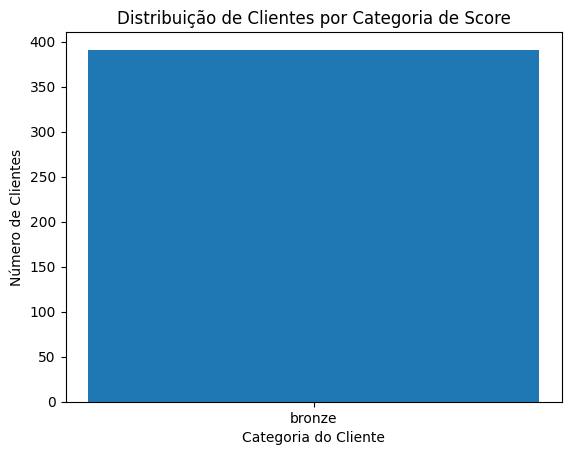

In [350]:
contagem_categorias = df['categoria_cliente'].value_counts()

# Criando o gráfico de barras
plt.bar(contagem_categorias.index, contagem_categorias.values)

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de Clientes por Categoria de Score')
plt.xlabel('Categoria do Cliente')
plt.ylabel('Número de Clientes')

# Exibindo o gráfico
plt.show()